In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r"C:\Users\dell pc\OneDrive\Desktop\ML Projects\Customer Churn Prediction\Churn_Modelling.csv")

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.shape

(10000, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
df.duplicated().sum()  #check is there any duplicate row present

0

In [7]:
df['Exited'].value_counts()   #checking how many people left the bank and how many are still there

Exited
0    7963
1    2037
Name: count, dtype: int64

In [8]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [9]:
df.drop(columns = ['RowNumber', 'CustomerId', 'Surname'], inplace = True)

In [10]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [11]:
df = pd.get_dummies(df, columns =['Geography','Gender'], drop_first = True)  #doing one hot endoing as converting string values into number

In [12]:
df

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,False,False,True
9996,516,35,10,57369.61,1,1,1,101699.77,0,False,False,True
9997,709,36,7,0.00,1,0,1,42085.58,1,False,False,False
9998,772,42,3,75075.31,2,1,0,92888.52,1,True,False,True


In [13]:
x = df.drop(columns=['Exited'])
y = df['Exited']

In [14]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [15]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((8000, 11), (2000, 11), (8000,), (2000,))

In [16]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [17]:
x1 = scaler.fit_transform(x_train)
x2 = scaler.transform(x_test)    #here data is scaled as the values are big so by scaling values become small

In [18]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [19]:
model = Sequential()
model.add(Dense(11,activation='relu', input_dim = 11))   #input layer and it is connected to hidden layer\
model.add(Dense(11,activation='relu')) 
model.add(Dense(1,activation='sigmoid'))   #output layer

d:\python\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [20]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            12 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 276 (1.08 KB)

 Trainable params: 276 (1.08 KB)

 Non-trainable params: 0 (0.00 B)

In [21]:
model.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])   #model compilation

In [22]:
m1 = model.fit(x1,y_train,epochs=100,validation_split=0.2)   #epochs means how many time our model run to find out weights and biases 

Epoch 1/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7636 - loss: 0.5864 - val_accuracy: 0.7987 - val_loss: 0.4590
Epoch 2/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7908 - loss: 0.4641 - val_accuracy: 0.8025 - val_loss: 0.4249
Epoch 3/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8014 - loss: 0.4318 - val_accuracy: 0.8106 - val_loss: 0.4123
Epoch 4/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8008 - loss: 0.4257 - val_accuracy: 0.8131 - val_loss: 0.4047
Epoch 5/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8074 - loss: 0.4151 - val_accuracy: 0.8175 - val_loss: 0.3971
Epoch 6/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8160 - loss: 0.3917 - val_accuracy: 0.8188 - val_loss: 0.3872
Epoch 7/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8182 - loss: 0.3847 - val_accuracy: 0.8194 - val_loss: 0.3784
Epoch 8/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8257 - loss: 0.3823 - val_accu

In [23]:
model.layers[0].get_weights()   #calculating weights and biases of the input layer

[array([[ 1.19447038e-01,  1.35892630e-01,  6.14702329e-03,
         -1.80810422e-01, -9.08659771e-02,  2.83792615e-01,
          1.36409298e-01,  1.39561491e-02, -5.54051325e-02,
         -7.24840611e-02, -1.10132876e-03],
        [-2.81704128e-01, -4.13737476e-01,  2.61509299e-01,
          4.32166070e-01, -7.18841553e-01, -1.67557701e-01,
          5.34504116e-01,  4.11771331e-03, -5.54176927e-01,
          1.22082102e+00,  5.71011864e-02],
        [-3.95884693e-01, -5.39413020e-02,  3.54189030e-03,
          4.29721087e-01, -6.05547428e-02,  3.97511303e-01,
          3.13269466e-01, -7.02994838e-02, -2.12314017e-02,
          1.45726249e-01,  8.18539560e-02],
        [-2.29062349e-01,  3.55358899e-01, -2.71207422e-01,
          4.37156409e-01,  1.50328028e+00, -1.54002234e-01,
         -1.08024098e-01,  4.09592003e-01, -5.13737462e-02,
          1.47015629e-02,  1.72008634e-01],
        [ 3.34154725e-01, -5.29213488e-01, -8.87553215e-01,
          4.56914276e-01,  3.11806530e-01, -

In [24]:
model.layers[1].get_weights()   #calculating weights and biases of the hidden layer

[array([[-0.16200301,  0.2923651 , -0.12221641,  0.5171383 ,  0.06446191,
          0.45042795,  0.06692117, -0.5113642 , -0.3727935 ,  0.15775084,
         -0.35995236],
        [-0.05701289,  0.05686523, -0.05667365,  0.13785212, -0.3619242 ,
         -1.2291358 , -0.5812829 , -0.7065105 , -0.12088183,  0.08321134,
          0.2375085 ],
        [ 1.1022623 , -0.27589896, -0.2420531 , -0.06305845, -0.83243954,
          0.30037358, -0.3362487 ,  0.05364047, -0.34890726, -0.18474483,
         -0.5375314 ],
        [-0.16483648, -0.0201113 ,  0.11412297, -0.2875769 ,  0.0977673 ,
          0.6979523 ,  0.17797573, -0.32656473, -0.0489195 ,  0.10892052,
          0.0621894 ],
        [-0.34241712, -0.6857229 , -0.01794708,  0.25473985,  0.63763785,
         -0.15265948, -0.6973361 , -0.3950681 , -0.21018067, -0.6623763 ,
          0.24975921],
        [-0.18515539,  0.05450434,  0.15742177, -0.19550769,  0.3479149 ,
         -0.13280953,  0.5234692 , -0.3255124 , -0.10605803,  0.0604522

In [25]:
y1 = model.predict(x2)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [26]:
y_pred = np.where(y1>0.5,1,0)  #if y1>0.5 then 1 if not then 0

In [27]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.865

In [28]:
m1.history

{'accuracy': [0.785937488079071,
  0.7940624952316284,
  0.7998437285423279,
  0.803906261920929,
  0.8090624809265137,
  0.8151562213897705,
  0.8201562762260437,
  0.8378124833106995,
  0.8496875166893005,
  0.852343738079071,
  0.8571875095367432,
  0.8604687452316284,
  0.8615624904632568,
  0.8612499833106995,
  0.8612499833106995,
  0.8606250286102295,
  0.86328125,
  0.8631250262260437,
  0.8620312213897705,
  0.8635937571525574,
  0.8609374761581421,
  0.8626562356948853,
  0.8643749952316284,
  0.8635937571525574,
  0.8635937571525574,
  0.8620312213897705,
  0.8657812476158142,
  0.8653125166893005,
  0.8651562333106995,
  0.8639062643051147,
  0.8639062643051147,
  0.8645312786102295,
  0.8653125166893005,
  0.8656250238418579,
  0.8646875023841858,
  0.86328125,
  0.8643749952316284,
  0.8643749952316284,
  0.8653125166893005,
  0.8657812476158142,
  0.8660937547683716,
  0.866406261920929,
  0.8653125166893005,
  0.8659374713897705,
  0.8659374713897705,
  0.86531251668930

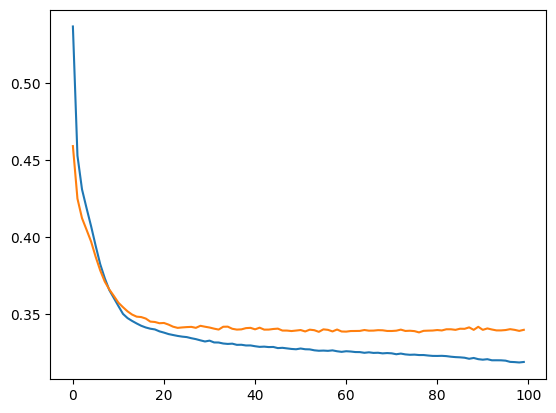

In [29]:
plt.plot(m1.history['loss'])
plt.plot(m1.history['val_loss'])
plt.show()

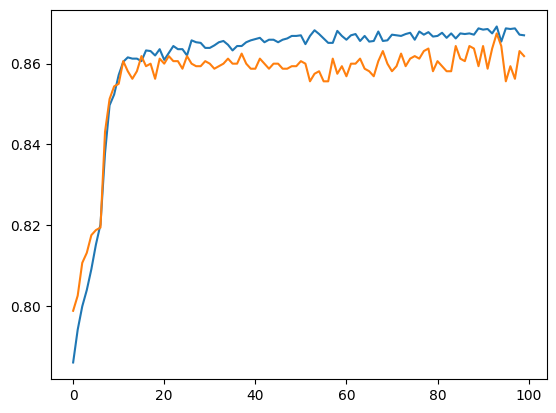

In [30]:
plt.plot(m1.history['accuracy'])
plt.plot(m1.history['val_accuracy'])
plt.show()